# Project: [Auto Mpg data Analysis]
## Table of Contents
<ul>
<li><a href="#Intro">Introduction</a></li>
<li><a href="#Exploring">Exploring</a></li>
<li><a href="#Exploring Summary">Exploring Summary</a></li>
<li><a href="#Cleaning">Data Manipulation</a></li>    
<li><a href="#Visualize">visualization</a></li>
<li><a href="#Conclusion">Conclusion</a></li>
  
</ul>

<a id='intro'></a>


## Introduction

### Dataset Description 

> `mpg` Miles per galon of fuel

> `cylinders` Number of engine cylinders .A cylinder is a crucial part of the engine where fuel is combusted and power is generated. It consists of a piston, an inlet, and exhaust valves at the top.

>`Horsepower` Refers to the power an engine produces. 

> `weight`: Weight of car

>`Acceleration`: The acceleration an engine can get per second

>`model year`  Car release year from 1970 to 1982

>`origin` Car manufacturing place (1 -> USA, 2 -> Europe, 3 -> Asia) 

>`car name`:Car model name (unique for each instance)


*The data is from https://www.kaggle.com/uciml/autompg-dataset*

# Setting up the notebook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 
import plotly.express as px
sns.set_style("darkgrid")
sns.set_context("poster")

In [2]:
# Loading data
df=pd.read_csv("auto-mpg.csv")

<a id='Exploring'></a>
# Exploring Data
## I will check the  things below to Understand the Dataset:

* shape of our dataset
* Head of the dataset
* Number of samples and columns in each dataset
* Duplicate rows in each dataset
* Datatypes of columns
* Features with missing values
* Number of non-null unique values for features in each dataset
* What those unique values are and counts for each

In [3]:
# One of the most important thing to have a look at is the dimension of the data frame so let's view it.
df.shape

(398, 9)

###  Based on the cell above 
#### The data set being  has**`398 records/cells`**  and **`9 columns/variables`**in our data frame.

In [4]:
# taking a look at the data
df.head() # by default will print 5 obs

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [5]:
# To check the Information about the data to see the name of the variables, how many nonmissing values in each variables and data types of those variable. Also the dimentions of tha data frame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [6]:
#Check column names
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [7]:
# Check if the data contain duplicated row or not 
df.duplicated().sum()

0

<a id='Exploring Summary'></a>
## Exploring Summary

### From the above I noticed that :
#####  There is Nothing missing values!

##### Although the values in `Horsepower` column we saw above were clearly numbers , the column is object and not a float or int,now we have to be a little bit suspicious about something. The variable is most likely to have some non-numeric items,So, Let's look at the unique elements of horsepower to look for discrepancies. 
##### There is Nothing duplicated values!
##### The `Origin` column would need to be parsed and casted into a categorical datatype.

<a id='cleaning'></a>

## Data Manipulation :

Sometimes the data that we have is not the data we need or can use directly. For example, we may have some missing values, or different type of alphabets, unmatching date types, etc,so I'd perform cleaning operations ,which would help me to reach a more accurate result in creating meaningful and informative visualizations.

> ### Removing spaces from column names :

In [8]:
df.columns=df.columns.str.replace(' ','_')
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'car_name'],
      dtype='object')

> ### clean `horsepower` column :

In [9]:
#Let's have a look at all the unique values stored in 'horsepower' variable.
df['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [10]:
(df["horsepower"]=='?').sum()

6

 > * `horsepower` column contain 6 `?`, and that is what is giving us the object data type instead of int.

In [11]:
df['horsepower']=pd.to_numeric(df['horsepower'],errors='coerce')
(df["horsepower"]=='?').sum()

0

> ##### Let's make a median imputation for those '?', then convert 'horsepower' to integers.

In [12]:
# fill 'NaN' value with median
df['horsepower'].fillna(df['horsepower'].median(), inplace=True)

In [13]:
# fill '?' value with mode
# df["horsepower"].replace('?',(df["horsepower"].mode()[0]),inplace=True)
# confirming changes
#(df["horsepower"]=='?').sum()

In [14]:
df["horsepower"]=df["horsepower"].astype("int")
# confirming changes
df["horsepower"].dtypes

dtype('int32')

> ### clean `origin` column:
>> * According to the provided description (1 -> `USA`, 2 -> `Europe`, 3 -> `Asia`)

In [15]:
df['origin']=df['origin'].replace(1,"USA")
df['origin']=df['origin'].replace(2,"Europe")
df['origin']=df['origin'].replace(3,"Asia")

In [16]:
# casting its datatype as category
df['origin'] = df['origin'].astype('category')
# confirming changes
df['origin'].value_counts()

USA       249
Asia       79
Europe     70
Name: origin, dtype: int64

In [17]:
df.isnull().any()

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model_year      False
origin          False
car_name        False
dtype: bool

Now, data is cleaning and ready for the next step `EDA`to get some meaningful insights!
>
>- There is No wrong data type
>- There is No NaN values 
>- All columns are cleaning 

### More on Impressions:
##### We have seen what we firstly had to see, now it is time to have some numerical impressions.

###### Personally, I prefer to see the summary statistics of the data set.

###### Quick question: What does summary statistics mean ???

###### Summary statistics provide statistical information about your data set. count, Mean, standard deviation, range, minimum-maximum pointsand quantiles of each numeric variable are summarize your data, give statistical insight of your data.


In [18]:
# Now everything looks in order so lets continue, let's describe the dataset
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.51,7.82,9.0,17.50,23.0,29.00,46.6
cylinders,398.0,5.45,1.70,3.0,4.00,4.0,8.00,8.0
displacement,398.0,193.43,104.27,68.0,104.25,148.5,262.00,455.0
horsepower,398.0,104.30,38.22,46.0,76.00,93.0,125.00,230.0
weight,398.0,2970.42,846.84,1613.0,2223.75,2803.5,3608.00,5140.0
acceleration,398.0,15.57,2.76,8.0,13.82,15.5,17.18,24.8
model_year,398.0,76.01,3.70,70.0,73.00,76.0,79.00,82.0


#### After seeing summary statistics for each variables seperately, the correlations of the variables is what we may wish to see before going into detail. To achieve a correlation matrix, all you need to use corr() function. This function will return a matrix where you can see correlation values between 2 variables.

In [19]:
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.773522,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.841367,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.895849,0.932824,-0.543684,-0.370164
horsepower,-0.773522,0.841367,0.895849,1.000000,0.862502,-0.686676,-0.413816
weight,-0.831741,0.896017,0.932824,0.862502,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.686676,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.413816,-0.306564,0.288137,1.000000


#### For better eye view, let's visualize it.

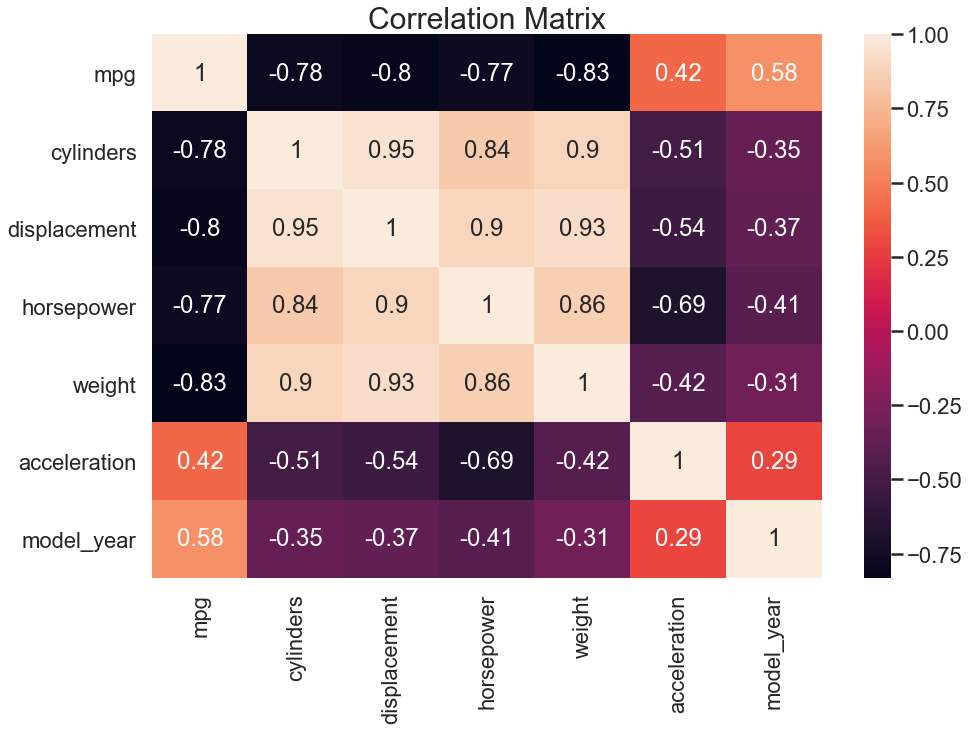

In [20]:
#Heat map Corr will state more insights 
f, ax = plt.subplots(figsize= [15, 10])
ax.set_title("Correlation Matrix", fontsize=30)
sns.heatmap(df.corr(),annot=True);

> ##### From abave the displacement, horsepower and weight have strong negative relationship, which might consist multicolinearity within them. Also, acceleration is not much signifcant in predicting mpg.

<a id='visualize'></a>
## Time to visulization
#### In this section, I will use some informative visuals to help in drawing insights and conclusions about  data and also helping in EDA

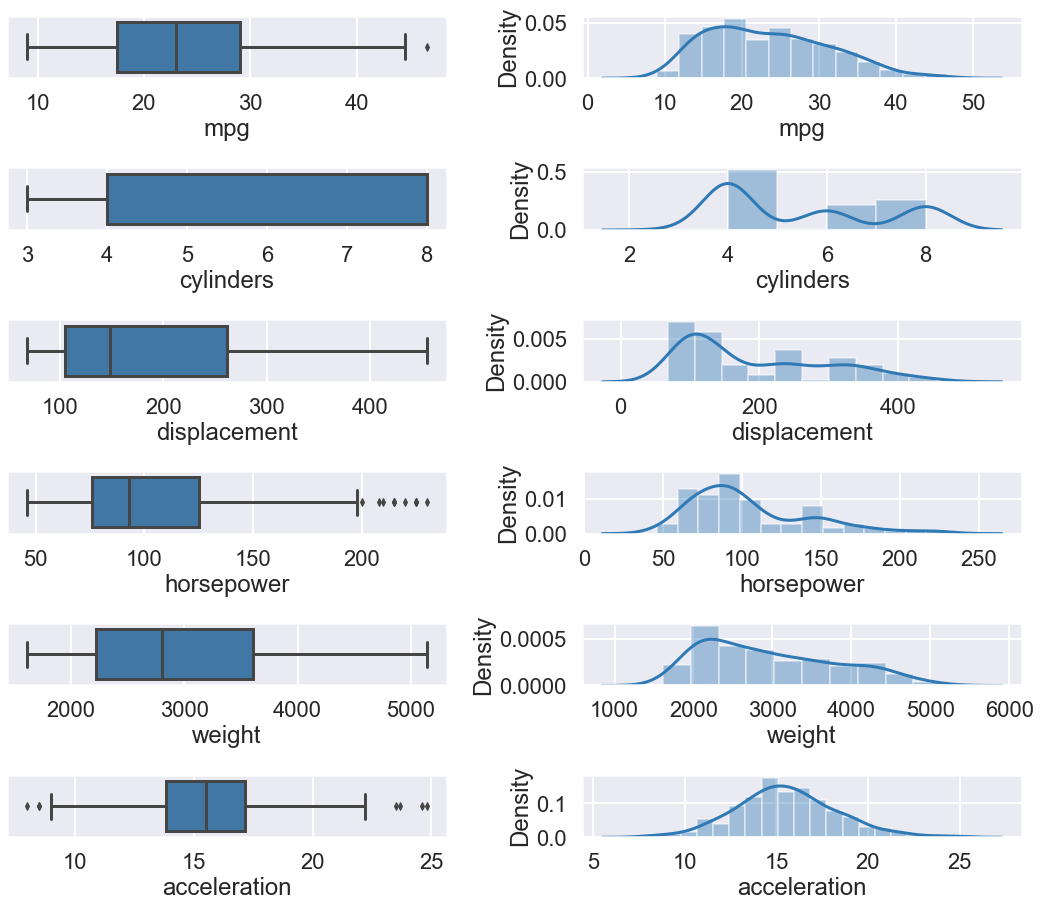

In [21]:
# Exploring the range and distribution of numerical Variables 
sns.set_palette("RdBu_r")
fig, ax = plt.subplots(6, 2, figsize = (15, 13))
sns.boxplot(x= df["mpg"], ax = ax[0,0])
sns.distplot(df['mpg'], ax = ax[0,1])

sns.boxplot(x= df["cylinders"], ax = ax[1,0])
sns.distplot(df['cylinders'], ax = ax[1,1])

sns.boxplot(x= df["displacement"], ax = ax[2,0])
sns.distplot(df['displacement'], ax = ax[2,1])

sns.boxplot(x= df["horsepower"], ax = ax[3,0])
sns.distplot(df['horsepower'], ax = ax[3,1])

sns.boxplot(x= df["weight"], ax = ax[4,0])
sns.distplot(df['weight'], ax = ax[4,1])

sns.boxplot(x= df["acceleration"], ax = ax[5,0])
sns.distplot(df['acceleration'], ax = ax[5,1])

plt.tight_layout()

> lets find out more information from these 7 charts
>##### Year on Year Manufacturers have focussed on increasing the mileage of the engines.
>####  Nobody manufactures `7` cylinder. 
>#### `4` cylinder has better mileage performance than other and most manufactured one.
>##### `8` cylinder engines have low mileage count.
>##### `Displacement`, `weight`, `horsepower` are inversely related to mileage so more of them means low `mileage`.


In [22]:
df["car_name"].unique()

array(['chevrolet chevelle malibu', 'buick skylark 320',
       'plymouth satellite', 'amc rebel sst', 'ford torino',
       'ford galaxie 500', 'chevrolet impala', 'plymouth fury iii',
       'pontiac catalina', 'amc ambassador dpl', 'dodge challenger se',
       "plymouth 'cuda 340", 'chevrolet monte carlo',
       'buick estate wagon (sw)', 'toyota corona mark ii',
       'plymouth duster', 'amc hornet', 'ford maverick', 'datsun pl510',
       'volkswagen 1131 deluxe sedan', 'peugeot 504', 'audi 100 ls',
       'saab 99e', 'bmw 2002', 'amc gremlin', 'ford f250', 'chevy c20',
       'dodge d200', 'hi 1200d', 'chevrolet vega 2300', 'toyota corona',
       'ford pinto', 'plymouth satellite custom', 'ford torino 500',
       'amc matador', 'pontiac catalina brougham', 'dodge monaco (sw)',
       'ford country squire (sw)', 'pontiac safari (sw)',
       'amc hornet sportabout (sw)', 'chevrolet vega (sw)',
       'pontiac firebird', 'ford mustang', 'mercury capri 2000',
       'opel 1900'

In [23]:
df["car_name"]= df["car_name"].str.split().str.get(0)
df["car_name"].unique()

array(['chevrolet', 'buick', 'plymouth', 'amc', 'ford', 'pontiac',
       'dodge', 'toyota', 'datsun', 'volkswagen', 'peugeot', 'audi',
       'saab', 'bmw', 'chevy', 'hi', 'mercury', 'opel', 'fiat',
       'oldsmobile', 'chrysler', 'mazda', 'volvo', 'renault', 'toyouta',
       'maxda', 'honda', 'subaru', 'chevroelt', 'capri', 'vw',
       'mercedes-benz', 'cadillac', 'mercedes', 'vokswagen', 'triumph',
       'nissan'], dtype=object)

In [24]:
# Correct brand name 
df['car_name'] = df['car_name'].str.replace('chevroelt|chevrolet|chevy','chevrolet')
df['car_name'] = df['car_name'].str.replace('maxda|mazda','mazda')
df['car_name'] = df['car_name'].str.replace('mercedes|mercedes-benz|mercedes benz','mercedes')
df['car_name'] = df['car_name'].str.replace('toyota|toyouta','toyota')
df['car_name'] = df['car_name'].str.replace('vokswagen|volkswagen|vw','volkswagen')

df.groupby(['car_name']).sum()#.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
car_name,,,,,,,
amc,510.9,178,7005.0,3190,91858,427.4,2080
audi,187.0,30,783.0,607,17893,111.6,530
bmw,47.5,8,242.0,223,4834,25.3,147
buick,326.1,110,4640.0,2319,60407,249.9,1294
cadillac,39.5,16,700.0,305,8280,29.5,155
capri,25.0,4,140.0,92,2572,14.9,76
chevrolet,950.3,290,11254.0,5388,155917,723.7,3550
chrysler,103.6,42,1981.0,922,23472,79.8,464
datsun,715.6,98,2375.0,1928,51571,377.4,1768


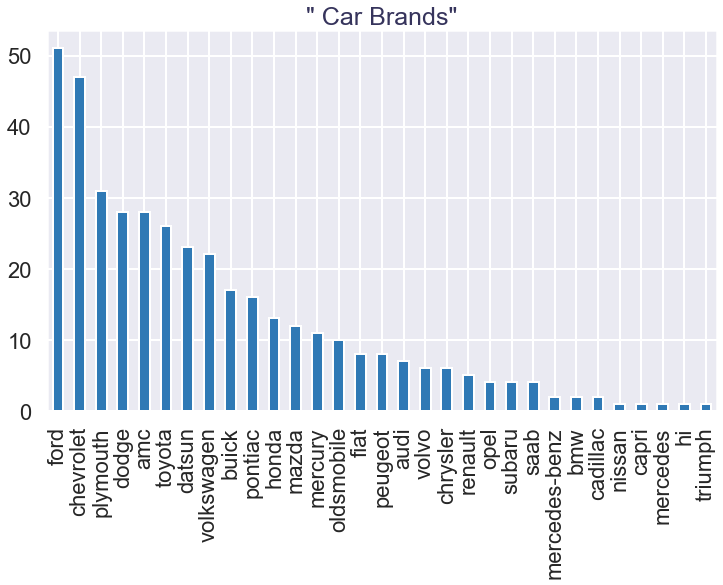

In [25]:
# Counts of each brands
df["car_name"].value_counts().plot(kind="bar", figsize=(12,7))
plt.title(' " Car Brands" ', fontsize = 25, color="#36345C");

Get the relation between origin country and model of cars

In [26]:
pd.DataFrame(df.groupby(by="origin").car_name.value_counts())

car_name
origin car_name               
Asia   toyota               26
       datsun               23
       honda                13
       mazda                12
       subaru                4
       nissan                1
Europe volkswagen           22
       fiat                  8
       peugeot               8
       audi                  7
       volvo                 6
       renault               5
       opel                  4
       saab                  4
       bmw                   2
       mercedes-benz         2
       mercedes              1
       triumph               1
USA    ford                 51
       chevrolet            47
       plymouth             31
       amc                  28
       dodge                28
       buick                17
       pontiac              16
       mercury              11
       oldsmobile           10
       chrysler              6
       cadillac              2
       capri                 1
       hi                    1

For better eye view, let's visualize it using sunbrust from plotly.

In [ ]:
fig= px.sunburst(df, path=['origin', "car_name"], title= "Country and car models")
fig.update_layout(margin=dict(t=0, l=0, r=0, b=0)).update_traces(texttemplate="%{label}<br>%{percentEntry:.2%}")

>As expected, the brand of each car differs according to the country in which it was manufactured.

>`Car_names` helped  alot to get a better intution in analysis. And here ends the role of it. So, I'm going to drop it
and I will depend my analysis on the physical characteristics of the cars rather than the model_names or manufacturers .

In [ ]:
df.drop("car_name", axis=1, inplace=True)

In [ ]:
# displaying histgram of mpg column
sns.set_palette("GnBu_r")
plt.figure(figsize=(15,5))
df['mpg'].hist()
plt.title("Miles per galon Distribution", fontsize = 30)
plt.xlabel("Miles per galon of fuel", fontsize = 25)
plt.ylabel("Frequency", fontsize = 25);

> ##### Most cars have mpg between 15 to 20 and there are a few cars that drive many miles per gallon , Which means that few cars are more efficient.

In [ ]:
# displaying histgram of cylinder column
plt.figure(figsize=(15,5))
df['cylinders'].hist()
plt.title("Cylinder Distribution", fontsize = 30)
plt.xlabel("Cylinder", fontsize = 25)
plt.ylabel("Cars count", fontsize = 25);

> ##### Most cars have `4` cylinder engine.

#### Now, I will compare these findings together.

In [ ]:
# ploting clynders VS mpg
sns.set_palette("RdBu_r")
plt.figure(figsize=(15,5))
sns.boxplot(x = 'cylinders', y = 'mpg', data = df, linewidth=5)
plt.title("Clynders VS Mpg", fontsize = 30)
plt.xlabel("Clynders", fontsize = 25)
plt.ylabel("Mpg", fontsize = 25);

> ##### As `cylinders` in the engine increases above `4` ,`MPG` decreases

#### Now, let's take a closer look at `Model_year` coulmn .

In [ ]:
# displaying histgram of model_year column
sns.set_palette("RdBu_r")
plt.figure(figsize=(15,5))
plt.title("Model year distribution", fontsize = 30)
plt.xlabel("Model_year", fontsize = 25)
plt.ylabel("Cars_count", fontsize = 25)
df['model_year'].hist();

> ##### The `Model_year` column contains info about cars from 1970 to 1982 and  most of  cars are produced in 1976.

#### Now, let's take a closer look at `Horsepower` column and compare it with `Cylinders` column ,then comparing them with `Mpg` column.

In [ ]:
# displaying histgram of Horsepower column
#sns.set_palette("PRGn")
sns.set_palette("GnBu_r")
plt.figure(figsize=(15,5))
plt.title("Horsepower distribution", fontsize = 30)
plt.xlabel("Horsepower", fontsize = 25)
plt.ylabel("Cars_count", fontsize = 25)
df['horsepower'].hist();

In [ ]:
# ploting Cylinders VS Horsepower
sns.set_palette("GnBu_r")
plt.figure(figsize=(15,5))
plt.title("Clynders VS Horsepower", fontsize = 30)
sns.boxplot(x = 'cylinders', y = 'horsepower', data = df, linewidth=5)
plt.xlabel("Clynders", fontsize = 25)
plt.ylabel("Horsepower", fontsize = 25);

> ##### As `Cylinders` in the engine increases above 4, `Engine Horsepower` increases.

In [ ]:
# ploting Horsepower VS Mpg with respect to cylinders
ax=sns.relplot(x = 'horsepower', y = 'mpg', hue='cylinders',height=6,aspect=1.30, data = df, kind="scatter", style="cylinders",palette=['#303131','#038CBA','green','#1B3E84','#021538'])
ax.fig.suptitle("Horsepower VS Mpg with respect to Cylinders",y=1, fontsize = 20)
ax.set(xlabel="Horsepower",ylabel="Mpg");

> ##### There is Negative correlation between `Mpg` and `Horsepower`.
> ##### Higher `Mpg` has Lower `Horsepower`.

> ##### Confirming the above, the increase in `Cylinders` and `Horsepower` decreases efficient of the car , as It burns more fuel and decreases `mpg`.

#### Now, I'll explore `origin` column to find insights about each manufacturing country and then explore its relations between other columns.

In [ ]:
# ploting cars origin dist.
plt.figure(figsize=[14, 6])
plt.title(' "The percentage of cars in  countries of origin" ', fontsize = 25, y=1.1, color="#36345C")
plt.pie(x=df['origin'].value_counts(),
        autopct="%.2f",explode=[0.02, 0.02,0.02],
        shadow=True,
        labels=['USA', 'Europe', 'Japan'],textprops={"fontsize":25, "style":"italic"});

In [ ]:
# ploting Origin VS Mpg
plt.figure(figsize=(15,5))
sns.set_palette("GnBu_r")
plt.title("Origin VS Mpg", fontsize = 30)
sns.boxplot(x = 'origin', y = 'mpg', data =df, linewidth=5)
plt.xlabel("Origin", fontsize = 25)
plt.ylabel("Mpg", fontsize = 25);

> ##### `Asia` produces cars with the highest `Mpg`, followed by `Europe` and finally the `USA` with the lowest  `Mpg`.
> ##### The American made cars are the least efficient in our dataset, as they drive less mileage per gallon, which means burning more fuel.
american made cars take values from 9 and up to 39 with little number of outliers.
On average japan origin country of cars drive more mileages-per-gallon. And it takes values from 18 up to 46 mileage per gallon.

In [ ]:
# ploting Origin VS Horsepower
sns.set_palette("RdBu_r")
plt.figure(figsize=(15,5))
plt.title("Origin VS Horsepower", fontsize = 30)
sns.boxplot(x = 'origin', y = 'horsepower', data = df, linewidth=5)
plt.xlabel("Origin", fontsize = 25)
plt.ylabel("Horsepower", fontsize = 25);

> ##### As expected, `USA` has the highest engine `Horsepower` followed by `Europe` and finally the `Asia` with the lowest engine `Horsepower`. This implies the previously observed conclusion that `Hoursepower` and `Mpg` has a negative correlation.

In [ ]:
# ploting Model_year VS Mpg with respect to origin
plt.figure(figsize=(15,7))
sns.boxplot(x = 'model_year', y = 'mpg', hue='origin',palette=['#038CBA','#1B3E84','#021538'], data = df)
plt.title("Model_year VS Mpg with respect origin", fontsize = 27)
plt.xlabel("Model_year", fontsize = 25)
plt.ylabel("Mpg", fontsize = 25);

> ##### This plot confirms the positive correlation between `Model_year` and `Mpg`,where it is from the year 1973, there has been a noticable increase in `Mpg`.

>And this plot show also that `MPG` for `American cars` increased in `1971` from `1970`, and decreased from `1971` to `1973`, until it was less than `1970`,Then it increased again from `1973` to `1974`, then relapsed slightly in `1975`, after which it increased almost regularly, but it was always less than `Japane` and the `Europe`.

>As for `Japanese and European cars`, the `MPG` was increasing and decreasing randomly.

In [ ]:
# ploting Acceleration VS Cylinders
sns.set_palette("Blues")
plt.figure(figsize=(15,5))
plt.title("Acceleration VS Cylinders", fontsize = 30)
sns.boxplot(x = 'cylinders', y = 'acceleration', data = df, linewidth=5)
plt.xlabel("Acceleration", fontsize = 25)
plt.ylabel("Cylinders", fontsize = 25);

> Cars with `5` Cylinders have highest `acceleration`.

#### Now I will explore how `Weight` has been affecting  `Car Specifications` over the years.

In [ ]:
# displaying histgram of weight column
sns.set_palette("RdBu_r")
plt.figure(figsize=(15,5))
plt.title("Car Weight Distribution", fontsize = 30)
plt.xlabel("Car Weight", fontsize = 25)
plt.ylabel("Car count", fontsize = 25)
df['weight'].hist();

> #####   The majority of cars weight at `2000`.

In [ ]:
# plotting Weight VS Model_year
plt.figure(figsize=(15,5))
plt.title("Weight VS Model_year", fontsize = 30)
sns.barplot(x = 'model_year', y = 'weight', data = df,color="#00468b")
plt.xlabel("Model_year", fontsize = 25)
plt.ylabel("Car Weight", fontsize = 25);

In [ ]:
# plotting Weight VS Model_year
sns.set_palette("Set1")
plt.figure(figsize=(15,5))
plt.title("Weight VS Model_year", fontsize = 30)
sns.lineplot(x = 'model_year', y = 'weight', data = df,hue="origin",ci=None)
plt.xlabel("Model_year", fontsize = 25)
plt.ylabel("Car Weight", fontsize = 25);

> ##### `Car Weight` has been decreasing over the years.

In [ ]:
# plotting Weight VS Origin
plt.figure(figsize=(15,5))
plt.title("Weight VS Origin", fontsize = 30)
sns.barplot(x = 'origin', y = 'weight', data =df,color="#00468b")
plt.xlabel("Origin", fontsize = 25)
plt.ylabel("Car weight", fontsize = 25);

> ##### As expected, `USA` gets the highest possible weight values, that explains alot about its low `Mpg` and high `Horsepower` & `cylinders`.
`Asia` produces the lightest cars compared to `USA` and `Europe`, this also explains it's high `Mpg` and low `Horsepower`& `cylinders`.

In [ ]:
fig, axes = plt.subplots(figsize=(20, 6), nrows=1, ncols=3, dpi=90)

sns.scatterplot(x="weight", y="mpg", data=df, hue="cylinders", ax=axes[0])
axes[0].set_title("Weight vs Miles per Gallon")

sns.scatterplot(x="weight", y="acceleration", data=df, hue="cylinders", ax=axes[1])
axes[1].set_title("Weight vs Acceleration")

sns.scatterplot(x="weight", y="horsepower", data=df, hue="cylinders", ax=axes[2])
axes[2].set_title("Weight vs Horsepower")

plt.show()

>Higher `Weight` has Lower `Mpg`.

>Higher `Weight` has Slower `Acceleration`.

>`Heavier Cars have Higher Horsepower`.

<a id='Conclusion'></a>
# Conclusion
### From the previous visualisations I conclude that:
##### As years pass after 1973, there has been a noticable increase in mpg.

##### As cylinders in the engine increases above 4, MPG decreases and engine horsepower increases. That indicates negative correlation between mpg and horsepower.

##### mpg increases as weight decreses over time, that also indecates a strong correlation between them.

##### The greater weight of car, greater it's horsepower,greater it's Cylnders and the lower it's Speed and Mpg.

##### Althogh USA has the biggest count of produced cars, its cars has relatively very low mpg  over the years, thus the highest possible weight , Horsepower and cylinders. compared to Asia and Europe.

##### Asia is the largest in the production of cars with the highest Mpg with the lowest engine Horsepower ,cylinders and with the lightest cars.compared to USA and Europe.